In [123]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn import linear_model, metrics, cross_validation

In [81]:
t1 = pd.read_csv('~/others_projects/mina/sheet1.csv')

In [96]:
t1.head(1)
print(len(t1))
t1.columns

609


Index(['Sr. #', ' Age/Sex', 'Presence of CAC', 'Hx of HTN', 'Comments', 'ACE',
       'ARB', 'BB', 'CCB', 'Others', 'CAC', 'Age', 'Sex'],
      dtype='object')

In [83]:
t1['CAC'] = t1['Presence of CAC'].str.lower().str.strip()
t1['CAC'].unique()

array(['no', nan, 'yes'], dtype=object)

In [126]:
t1['Age'] = t1[' Age/Sex'].str.split(' ').str[0]
t1['Sex'] = t1[' Age/Sex'].str.split(' ').str[1].str.upper().str.strip()
t1['Hx of HTN'] = t1['Hx of HTN'].str.upper().str.strip()
cleaned = t1[['CAC', 'Age', 'Sex', 'Hx of HTN']].dropna()
cleaned['Age'] = cacAge['Age'].astype(int)
cleaned.columns = ['CAC', 'Age', 'Sex', 'HTN']
cleaned.loc[cleaned.CAC == 'no', 'cacv'] = -1
cleaned.loc[cleaned.CAC == 'yes', 'cacv'] = 1
cleaned.loc[cleaned.HTN == 'NO', 'htnv'] = -1
cleaned.loc[cleaned.HTN == 'YES', 'htnv'] = 1
cleaned.loc[cleaned.Sex == 'M', 'sexv'] = -1
cleaned.loc[cleaned.Sex == 'F', 'sexv'] = 1

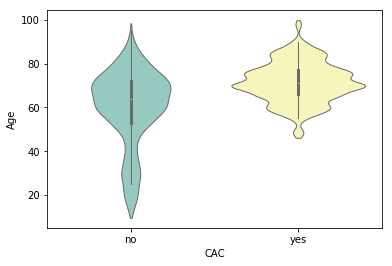

In [127]:
sns.violinplot(x='CAC', y='Age', data=cleaned, palette="Set3", bw=.2, cut=1, linewidth=1)

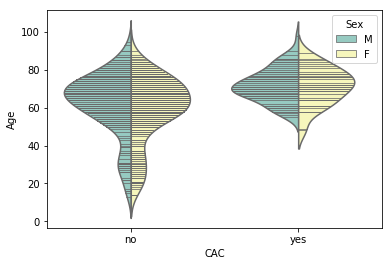

In [128]:
cleaned_noUndefinedSex = cleaned[cleaned['Sex'] != 'U']
sns.violinplot(x="CAC", y="Age", hue="Sex", data=cleaned_noUndefinedSex,
               split=True, inner="stick", palette="Set3");

[Text(0,0.5,'Sex Count')]

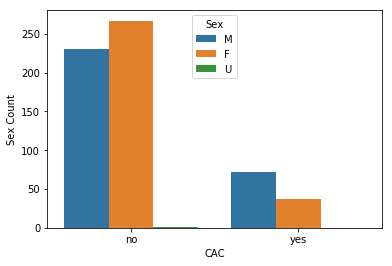

In [129]:
ax = sns.countplot(x="CAC", hue="Sex", data=cacSex)
ax.set(ylabel="Sex Count")

In [130]:
cleaned[['cacv', 'sexv']].corr(method='pearson')

,cacv,sexv
cacv,1.000000,-0.150995
sexv,-0.150995,1.000000


In [131]:
cleaned[['cacv', 'htnv']].corr(method='pearson')

,cacv,htnv
cacv,1.000000,0.390818
htnv,0.390818,1.000000


In [132]:
cleaned[['cacv', 'Age']].corr(method='pearson')

,cacv,Age
cacv,1.000000,0.261118
Age,0.261118,1.000000


In [135]:
logreg=linear_model.LogisticRegression()
y = cleaned_noUndefinedSex['cacv']
predicted = cross_validation.cross_val_predict(logreg, 
                                               cleaned_noUndefinedSex[['htnv', 'sexv', 'Age']], 
                                               y , cv=10)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))

0.800658978583
             precision    recall  f1-score   support

       -1.0       0.83      0.96      0.89       498
        1.0       0.29      0.07      0.12       109

avg / total       0.73      0.80      0.75       607

